<a href="https://colab.research.google.com/github/Jon227student/IS_170_Machine_Learning/blob/10.-Decision-Tree/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonathan Schultz

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
df = pd.read_csv("/content/cars.csv") 
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [ ]:
print(df.isnull().sum())
df.replace('', float("NaN"), inplace=True)
df.dropna(inplace=True)

mpg             0
 cylinders      0
 cubicinches    0
 hp             0
 weightlbs      0
 time-to-60     0
 year           0
 brand          0
dtype: int64


In [ ]:
#split dataset in features and target variable
x_data=df[[' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',' year']]	
y_data=df[' brand']


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1) # 70% training and 30% test


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8311688311688312


# **Visualizing Decision Trees**

In [ ]:
target = df[' brand']

print(target.unique())

[' US.' ' Europe.' ' Japan.']


In [ ]:
!pip install graphviz
!pip install pydotplus
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


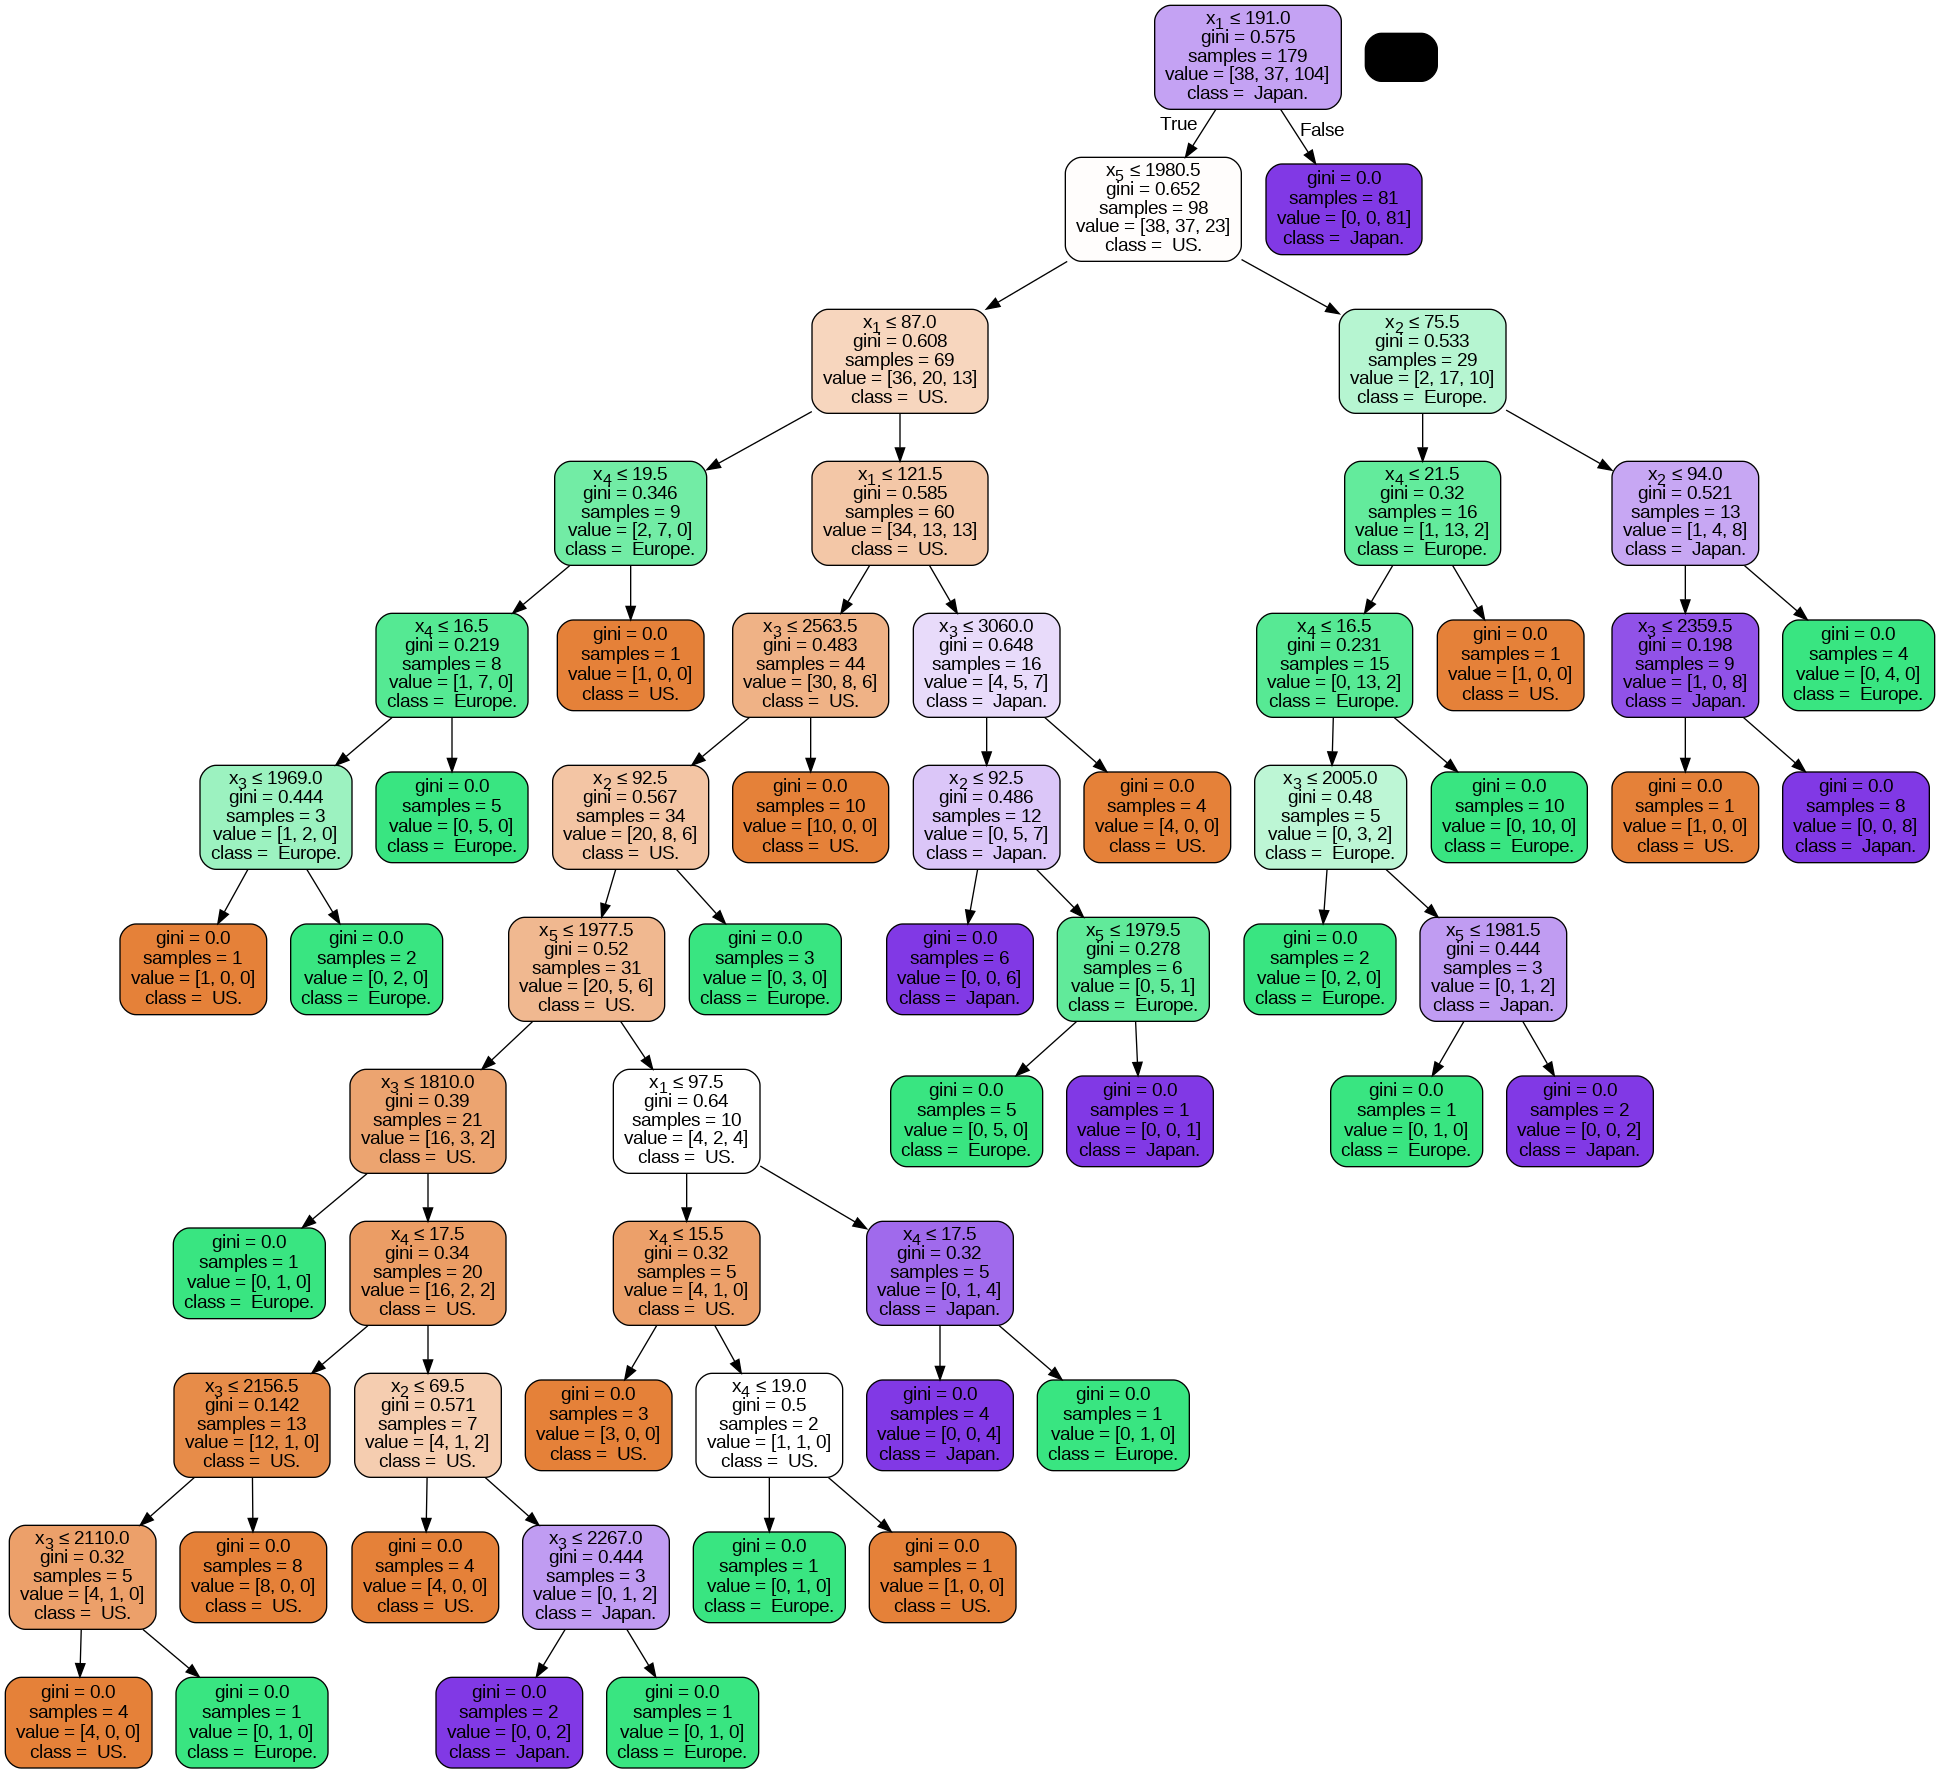

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=[' US.', ' Europe.', ' Japan.'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('carbrands.png')
Image(graph.create_png())